# Рубежный контроль №2 по курсу "Технологии машинного обучения"
## Группа: ИУ5-63Б. Студент: Халимонов А.М.
**Задание.** Для заданного набора данных (https://www.kaggle.com/atmcfarland/historical-us-president-physical-data-more) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (дерево решений и случайный лес). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Загрузка набора данных
data=pd.read_csv('dataset_22.csv', sep=",")
data.shape

(45, 32)

In [3]:
data.head()

,order,name,height_cm,height_in,weight_kg,weight_lb,body_mass_index,body_mass_index_range,birth_day,birth_month,...,term_begin_year,term_begin_date,term_end_day,term_end_month,term_end_year,term_end_date,presidency_begin_age,presidency_end_age,political_party,corrected_iq
0,1,George Washington,188,74.0,79.4,175,22.5,Normal,22,2,...,1789,30-04-1789,4.0,3.0,1797.0,04-03-1797,57,65.0,Unaffiliated,140.0
1,2,John Adams,170,67.0,83.9,185,29.0,Overweight,30,10,...,1797,04-03-1797,4.0,3.0,1801.0,04-03-1801,61,65.0,Federalist,155.0
2,3,Thomas Jefferson,189,74.5,82.1,181,23.0,Normal,13,4,...,1801,04-03-1801,4.0,3.0,1809.0,04-03-1809,57,65.0,Democratic-Republican,160.0
3,4,James Madison,163,64.0,55.3,122,20.8,Normal,16,3,...,1809,04-03-1809,4.0,3.0,1817.0,04-03-1817,57,65.0,Democratic-Republican,160.0
4,5,James Monroe,183,72.0,85.7,189,25.6,Overweight,28,4,...,1817,04-03-1817,4.0,3.0,1825.0,04-03-1825,58,66.0,Democratic-Republican,139.0


Удаление строк с пустыми значениями и удаление неиспользуемых атрибутов

In [4]:
data.dropna(axis = 0, how = 'any', inplace = True)
data.drop(['body_mass_index_range', 'height_in', 'weight_lb', 'death_day', 'death_month', 'death_year', 'death_date', 'birthplace', 'birth_state', 'astrological_sign', 'order', 'birth_date', 'death_date', 'term_begin_date', 'term_end_date'], axis = 1, inplace = True)
data.dtypes

name                     object
height_cm                 int64
weight_kg               float64
body_mass_index         float64
birth_day                 int64
birth_month               int64
birth_year                int64
death_age               float64
term_begin_day            int64
term_begin_month          int64
term_begin_year           int64
term_end_day            float64
term_end_month          float64
term_end_year           float64
presidency_begin_age      int64
presidency_end_age      float64
political_party          object
corrected_iq            float64
dtype: object

Произведём кодирование категориального признака "political_party" с помощью метода LabelEncoder

In [5]:
le = LabelEncoder()
data.name = le.fit_transform(data['name'])
data.political_party = le.fit_transform(data['political_party'])

Произведём масштабирование числовых признаков с помощью MinMax масштабирования

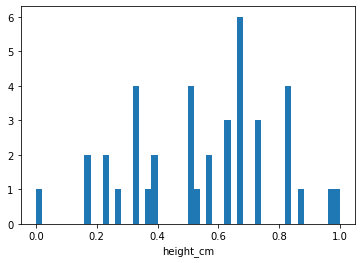

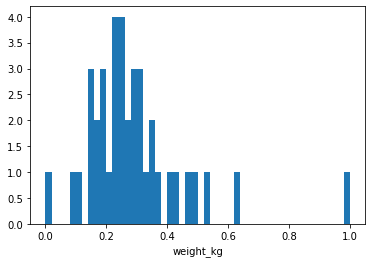

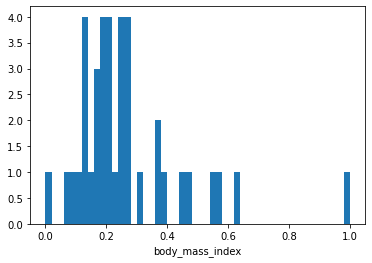

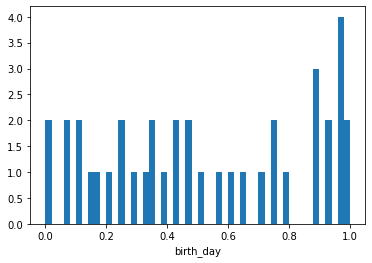

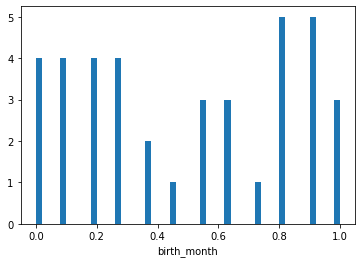

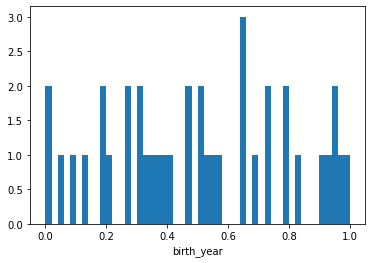

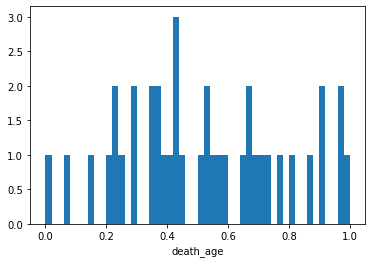

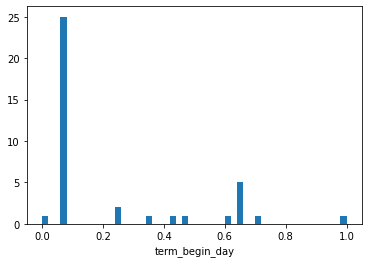

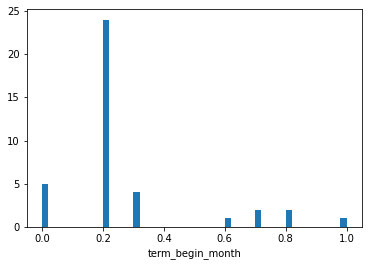

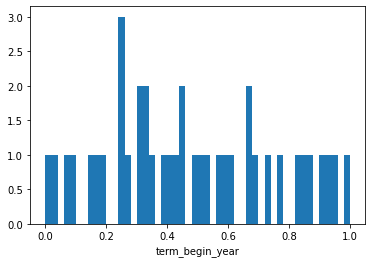

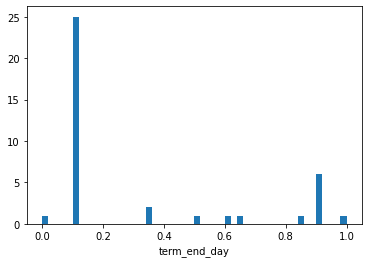

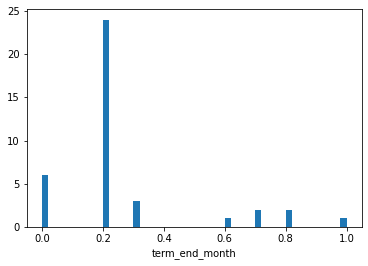

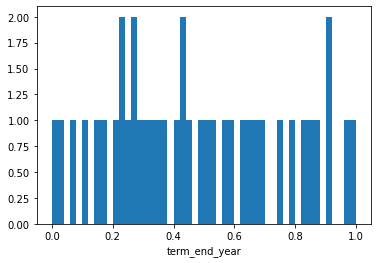

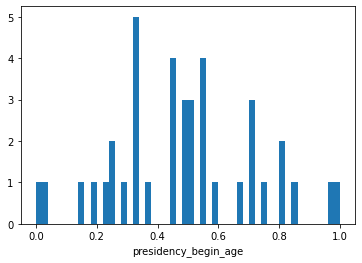

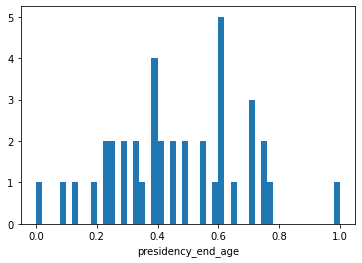

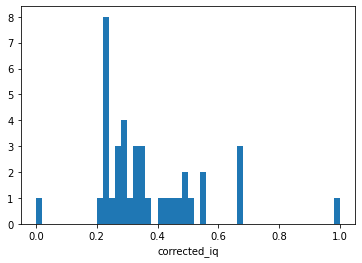

In [6]:
num_cols = ['height_cm', 'weight_kg', 'body_mass_index', 'birth_day', 'birth_month', 'birth_year', 'death_age', 'term_begin_day', 'term_begin_month', 'term_begin_year', 'term_end_day', 'term_end_month', 'term_end_year', 'presidency_begin_age', 'presidency_end_age', 'corrected_iq']

sc1 = MinMaxScaler()
for item in num_cols:
    data.loc[:, item] = sc1.fit_transform(data[[item]])
    
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

## Построение моделей
Разделение выборки на обучающую и тестовую

In [7]:
X = data.drop(['death_age'], axis = 1)
Y = data.death_age
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.30)

In [9]:
# Модель "Дерево решений"
dtc = DecisionTreeRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_dtc = dtc.predict(X_test)

In [10]:
# Модель "Случайный лес"
RF = RandomForestRegressor(random_state=1).fit(X_train, Y_train)
data_test_predicted_rf = RF.predict(X_test)

## Проверка качества моделей
В качестве метрик для оценки качества моделей будем использовать метрику **Mean squared error** и метрику **$R^2$**.

In [11]:
# Cредняя квадратичная ошибка
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(Y_test, data_test_predicted_dtc), mean_squared_error(Y_test, data_test_predicted_rf)))

Метрика MSE:
Дерево решений: 0.14037181712962965
Случайный лес: 0.06605884331597224


In [12]:
# Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(Y_test, data_test_predicted_dtc), r2_score(Y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: -1.6971680083396068
Случайный лес: -0.2692846933456883


Исходя из оценки качества построенных моделей можно увидеть, что модель "Случайный лес" лучше справляется с задачей по сравнению с моделью "Дерево решений".